# 회귀모델

## 회귀모델

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler       # 특성이 3개니까 표준화도 필요
import pandas as pd

df = pd.read_csv("Data/perch2.csv")       # 회귀모델

X = df.drop("weight", axis = 1).values
Y = df["weight"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [9]:
df.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [2]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation

model = keras.Sequential([         # 딥러닝 설계하기위한 도화지 만들어줌
    Input(shape = (3,)),     # 입력층 노드 3개 

    Dense(8),                # 은닉층 노드 8개
    BatchNormalization(),
    Activation("relu"),
    # Dropout(0.3),               # 과대적합 나면 넣어주기 (선택적으로)

    Dense(1)                 # 출력층 노드 1개 (어떤 값을 예측을 하는거니까. 활성화함수도 필요X)
])

model.compile(loss = "mse", optimizer="adam", metrics=["mae"])         # 분류모델일땐 loss = categorical cross entropy 였으나, 회귀모델에선 mse 또는 mae 
                                                                         # 보고싶은지표는 mae
es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 1000,
                   validation_data = (test_scaled, test_y),
                   callbacks = [es])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 295765.9375 - mae: 420.9549 - val_loss: 174191.7188 - val_mae: 282.0562
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 305136.2500 - mae: 424.6009 - val_loss: 174181.2344 - val_mae: 282.0453
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 304041.1562 - mae: 424.2124 - val_loss: 174171.5000 - val_mae: 282.0346
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 285654.9688 - mae: 405.8298 - val_loss: 174161.0000 - val_mae: 282.0234
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 294205.4688 - mae: 410.6292 - val_loss: 174150.1406 - val_mae: 282.0120
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 302390.7812 - mae: 420.6115 - val_loss: 174139.3281 - val_mae: 282.0006
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 298332.2812 - mae: 420.8352 - val_loss: 174129.0156 - val_mae: 281.9897
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 296785.7188 - mae: 411.

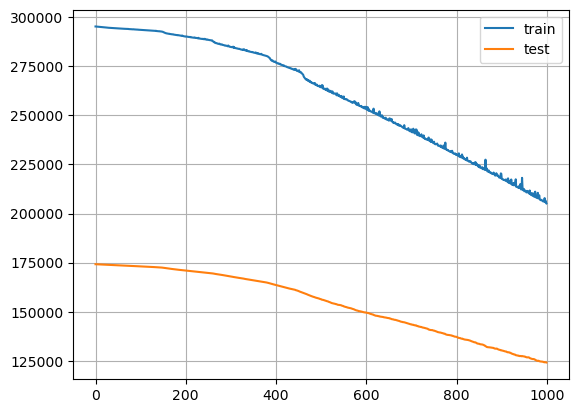

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])       # 에폭이 하나 끝날때마다 쳤던 시험데이터의 쪽지시험 
plt.legend(["train", "test"])
plt.grid()
plt.show()

### ㄴ 결과 좀 이상하긴 한데 코드 느낌만 알기

## 회귀모델 예제 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import pandas as pd

df = pd.read_csv("Data/boston_house_prices.csv")

X = df.drop("MEDV", axis = 1).values
Y = df["MEDV"].values

X.shape

(506, 13)

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [5]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation

model = keras.Sequential([ 
    Input(shape = (13,)),     # 입력층 노드 13개 

    Dense(32),                # 은닉층 노드 32개
    BatchNormalization(),
    # Activation("relu"),

    Dense(1)                 # 출력층 노드 1개
])

model.compile(loss = "mse", optimizer="adam", metrics=["mae"]) 

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 1000,
                   validation_data = (test_scaled, test_y),
                   callbacks = [es])

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 597.8470 - mae: 22.5697 - val_loss: 607.8348 - val_mae: 22.8936
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 528.8934 - mae: 21.5083 - val_loss: 592.9893 - val_mae: 22.7436
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 542.9855 - mae: 21.9665 - val_loss: 578.9196 - val_mae: 22.5901
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 536.3508 - mae: 21.7216 - val_loss: 565.0940 - val_mae: 22.4292
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 552.0741 - mae: 22.2161 - val_loss: 551.8939 - val_mae: 22.2583
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 503.5861 - mae: 21.4408 - val_loss: 539.2821 - val_mae: 22.0769
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 532.6076 - mae: 21.9666 - val_loss: 526.3347 - val_mae: 21.8793
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 486.5028 - mae: 21.1143 - val_loss: 513.6559 - val_mae: 21.6708
Epoch 9

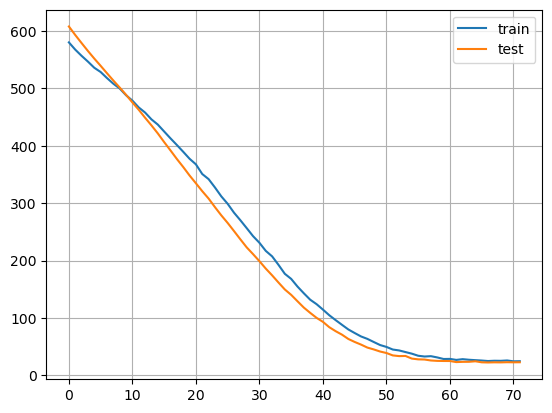

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

# 텍스트데이터 분류

## 분류모델 - 텍스트데이터 활용

In [6]:
df = pd.read_excel("Data/리뷰 데이터.xlsx")
df

# 부정적리뷰는 0, 긍정적리뷰는 1

,sentence,label
0,서비스는 감동적이었어요.,1
1,제품은 다시는 이용하지 않을래요.,0
2,책은 아주 만족합니다.,1
3,앱은 훌륭했어요.,1
4,음악은 형편없었어요.,0
...,...,...
995,경험은 아주 만족합니다.,1
996,음악은 기대 이상이었어요.,1
997,음악은 비추천합니다.,0
998,경험은 다시 이용하고 싶어요.,1


In [7]:
train_x, test_x, train_y, test_y = train_test_split(df["sentence"],
                                                    df["label"])        # 훈련데이터:시험데이터가 75:25로 쪼개짐

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer       # 텍스트를 토큰화해서 잘게 쪼개줌

# 사용할 단어 개수 (가장 많이 사용된 단어 순으로 1등~1000등까지 사용한다)
vocab_size = 1000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_x)         # 텍스트를 토큰화

In [9]:
tokenizer.word_index           # 각 토큰에 인덱스 부여
# 이 안에 없는 새로운 단어는 1로

{'<OOV>': 1,
 '이': 2,
 '기대': 3,
 '경험은': 4,
 '음악은': 5,
 '제품은': 6,
 '영화는': 7,
 '서비스는': 8,
 '정말': 9,
 '음식은': 10,
 '강의는': 11,
 '여행은': 12,
 '앱은': 13,
 '아주': 14,
 '책은': 15,
 '행복했어요': 16,
 '이상이었어요': 17,
 '이하였어요': 18,
 '추천합니다': 19,
 '불만족입니다': 20,
 '실망했어요': 21,
 '다시는': 22,
 '이용하지': 23,
 '않을래요': 24,
 '매우': 25,
 '유용했어요': 26,
 '훌륭했어요': 27,
 '다시': 28,
 '이용하고': 29,
 '싶어요': 30,
 '최고예요': 31,
 '도움이': 32,
 '되지': 33,
 '않았어요': 34,
 '별로였어요': 35,
 '불쾌했어요': 36,
 '좋았어요': 37,
 '최악이에요': 38,
 '감동적이었어요': 39,
 '비추천합니다': 40,
 '만족합니다': 41,
 '형편없었어요': 42}

In [10]:
train_seq = tokenizer.texts_to_sequences(train_x)       # 텍스트데이터를 숫자로
test_seq = tokenizer.texts_to_sequences(test_x)

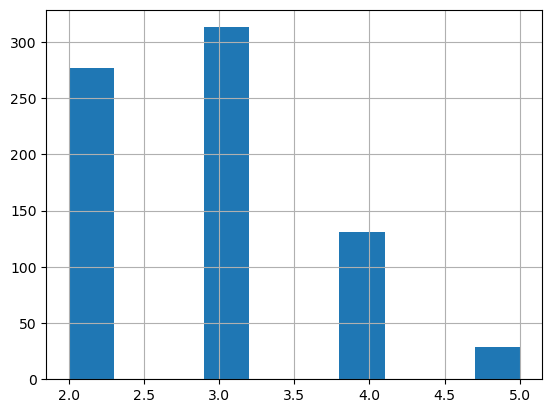

In [12]:
# 이미지데이터는 가로 28, 세로 28로 다 똑같았음
# 텍스트데이터는 다 다른데 입력층에 노드를 어떻게?

import matplotlib.pyplot as plt
box = []
for i in train_seq:
    box.append(len(i))       # 각 사람이 리뷰에 사용한 단어의 개수

plt.hist(box)
plt.grid()
plt.show()

In [13]:
from keras.preprocessing.sequence import pad_sequences

train_seq2 = pad_sequences(train_seq, 10)      # 부족하면 0으로 채워서 10개로 만들어줌 -> 다 똑같은 모양으로 맞춰짐
test_seq2 = pad_sequences(test_seq, 10)

In [14]:
# 원핫인코딩 - 각 숫자가 크다고좋고 이런거 없게
train_oh = keras.utils.to_categorical(train_seq2)
test_oh = keras.utils.to_categorical(test_seq2)

In [15]:
train_oh[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0.,

In [16]:
train_oh.shape           # 750개의 리뷰, 각각의 리뷰는 10행 43열 
                         #   = 단어가 10개 있고, 단어는 총 43개.

(750, 10, 43)

In [14]:
train_y.shape

(750,)

## 분류모델 설계 - RNN

In [17]:
from keras.layers import SimpleRNN, LSTM

model = keras.Sequential([       # 도화지
    Input(shape = (10, 43)),
    SimpleRNN(32),         # 노드에 갈고리가 걸려있는 형태
    Dense(2, activation="softmax")     # 분류모델이니
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,498 (9.76 KB)

 Trainable params: 2,498 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_oh, train_y, epochs = 100,
                   validation_data=(test_oh, test_y),
                   callbacks = [es])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4692 - loss: 0.7245 - val_accuracy: 0.6040 - val_loss: 0.6490
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7098 - loss: 0.6050 - val_accuracy: 0.7760 - val_loss: 0.5509
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8296 - loss: 0.5166 - val_accuracy: 0.8040 - val_loss: 0.4730
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8796 - loss: 0.4214 - val_accuracy: 0.9160 - val_loss: 0.3958
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9657 - loss: 0.3492 - val_accuracy: 0.9600 - val_loss: 0.3259
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.2817 - val_accuracy: 0.9800 - val_loss: 0.2590
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9965 - loss: 0.2293 - val_accuracy: 1.0000 - val_loss: 0.2017
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1819 - val_accuracy: 1.0000 - 

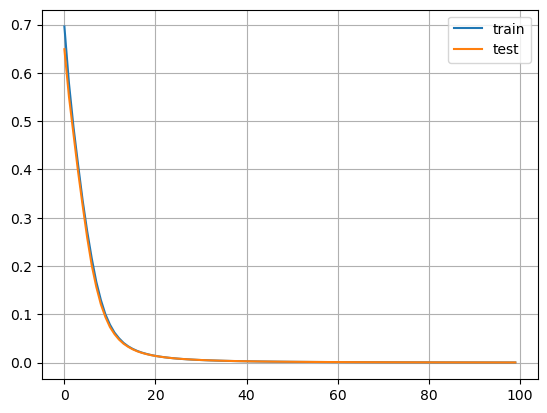

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [22]:
import numpy as np
np.set_printoptions(suppress=True)

In [23]:
# text = ["서비스는 감동적이었어요."]
text = ["음악은 형편없었어요."]

A = tokenizer.texts_to_sequences(text)     # 텍스트 토큰화
A = pad_sequences(A, 10)       # 10개로 맞춰줌
A = keras.utils.to_categorical(A, num_classes=43)    # 원핫인코딩.  단어 43개라고 학습했으니 43개로 맞춰주기 

model.predict(A)

# 부정적일 확률이 99.95%, 긍정적일 확률이 0.04%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.99955934, 0.00044059]], dtype=float32)

In [ ]:
import numpy as np
np.round(model.predict(A), 3)

## 분류모델 설계 - LSTM
LSTM : 고리가 4개. 학습이 잘 안될때 사용

In [73]:
from keras.layers import SimpleRNN, LSTM

model = keras.Sequential([       # 도화지
    Input(shape = (10, 43)),
    LSTM(32), 
    Dense(2, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# LSTM 여러개면

model = keras.Sequential([
    Input(shape = (10, 43)),
    LSTM(32, return_sequences=True),      # LSTM 여러개 있으면 그다음으로 갈때 시퀀스상태로 이동하도록 해야함
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(2, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 10, 32)              │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,114 (70.76 KB)

 Trainable params: 18,114 (70.76 KB)

 Non-trainable params: 0 (0.00 B)

## 비효율 수정; 원핫인코딩 하지않게

In [21]:
from tensorflow import keras
from keras.layers import Embedding
from keras.layers import SimpleRNN, LSTM

model = keras.Sequential([
    Input(shape = (10, )),    # 10개의 단어가 들어올 거다
    Embedding(input_dim = 1000, output_dim = 4),           # 1등부터 1000등까지 가져왔으므로 input 1000
    LSTM(32),
    Dense(2, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 4)               │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,802 (34.38 KB)

 Trainable params: 8,802 (34.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
train_seq2.shape

(750, 10)

In [23]:
train_y.shape

(750,)

In [25]:
history = model.fit(train_seq2, train_y, epochs = 10,
                   validation_data=(test_seq2, test_y))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4923 - loss: 0.6930 - val_accuracy: 0.5200 - val_loss: 0.6881
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5559 - loss: 0.6827 - val_accuracy: 0.6560 - val_loss: 0.6665
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6368 - loss: 0.6540 - val_accuracy: 0.6760 - val_loss: 0.6061
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6834 - loss: 0.5796 - val_accuracy: 0.8120 - val_loss: 0.4818
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9359 - loss: 0.4341 - val_accuracy: 0.9840 - val_loss: 0.2575
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.1958 - val_accuracy: 1.0000 - val_loss: 0.1123
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0804 - val_accuracy: 1.0000 - val_loss: 0.0432
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss

In [82]:
history = model.fit(train_seq2, train_y, epochs = 1000,
                   validation_data=(test_seq2, test_y),
                   callbacks = [es])

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5030 - loss: 0.6926 - val_accuracy: 0.5200 - val_loss: 0.6881
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4986 - loss: 0.6849 - val_accuracy: 0.5200 - val_loss: 0.6661
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6240 - loss: 0.6531 - val_accuracy: 0.6840 - val_loss: 0.6056
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7576 - loss: 0.5697 - val_accuracy: 0.9960 - val_loss: 0.4328
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9528 - loss: 0.3532 - val_accuracy: 1.0000 - val_loss: 0.1959
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.1573 - val_accuracy: 1.0000 - val_loss: 0.0816
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0650 - val_accuracy: 1.0000 - val_loss: 0.0377
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0299 - val_accuracy: 1

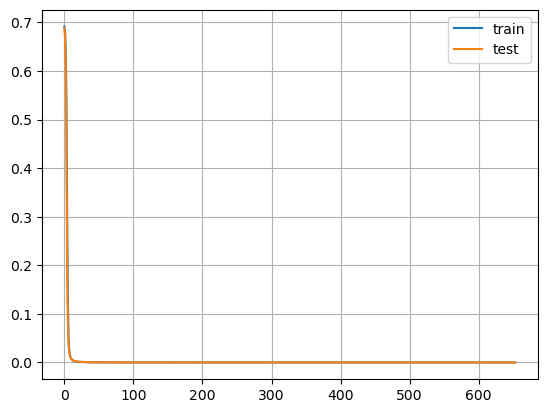

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

## 텍스트 분류 예제

In [26]:
# imdb : 영화 리뷰 데이터 (긍정 1, 부정 0)
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data(num_words=500)    # 1~500등까지 많이 사용된 단어들 // OOV : 2

In [89]:
train_x[0]       # 이미 임의의 숫자로 라벨링되어있음.   500등 안에 없는 건 2

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [88]:
train_x.shape, test_x.shape

((25000,), (25000,))

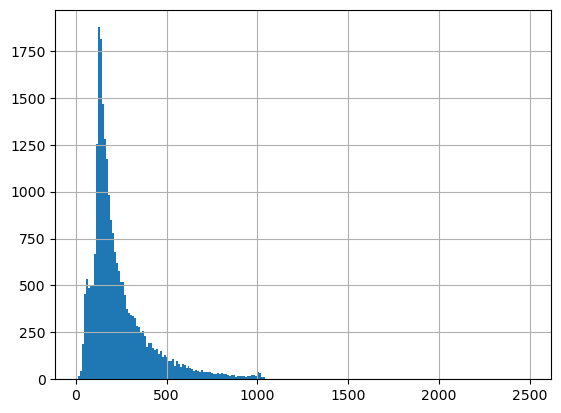

In [100]:
box = []
for i in train_x:
    box.append(len(i))       # 각 사람이 리뷰에 사용한 단어의 개수

plt.hist(box, bins = "auto")
plt.grid()
plt.show()

# 보통 200~300개 쓴다

In [101]:
# pre: 앞에서부터, post: 뒤에서부터

from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_x, 500, padding="pre", truncating="pre")  
# padding : 0채우는 것,  truncating : 자르는 것
test_seq = pad_sequences(test_x, 500, padding="pre", truncating="pre")  

In [102]:
from keras.layers import Embedding

model = keras.Sequential([
    Input(shape = (500, )),    # 500개의 단어가 들어올 거다
    Embedding(input_dim = 500, output_dim = 100),           # 1등부터500등
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
    # Dense(2, activation="softmax")    # 위와같음
])

model.compile(loss = "binary_crossentropy",      # 이진분류에서 정답이 0 또는 1일때 사용
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 500, 100)            │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 500, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,305 (360.57 KB)

 Trainable params: 92,305 (360.57 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
history = model.fit(train_seq, train_y, epochs = 10,
                   validation_data=(test_seq, test_y))
                   # callbacks = [es])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 183ms/step - accuracy: 0.6584 - loss: 0.6109 - val_accuracy: 0.7480 - val_loss: 0.5256
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 196ms/step - accuracy: 0.7471 - loss: 0.5271 - val_accuracy: 0.7444 - val_loss: 0.5296
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - accuracy: 0.8043 - loss: 0.4445 - val_accuracy: 0.8311 - val_loss: 0.3881
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 209ms/step - accuracy: 0.8295 - loss: 0.3873 - val_accuracy: 0.8300 - val_loss: 0.4038
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.8261 - loss: 0.4086 - val_accuracy: 0.8518 - val_loss: 0.3432
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 222ms/step - accuracy: 0.8603 - loss: 0.3342 - val_accuracy: 0.8622 - val_loss: 0.3258
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 221ms/step - accuracy: 0.8663 - loss: 0.3202 - val_accuracy: 0.8572 - val_loss: 0.3279
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 236ms/step - accuracy: 0.8688 -

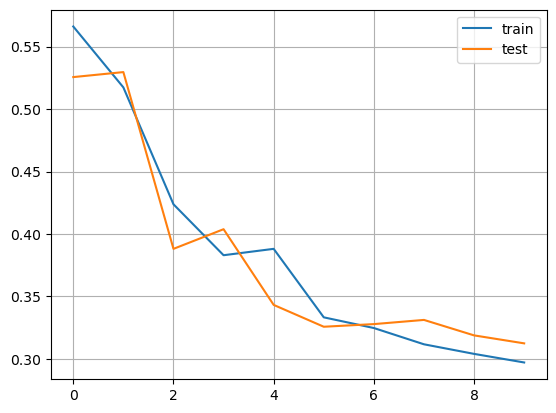

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()